<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/PySparkRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/바이너리인코딩.csv',encoding='utf-8',)
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타,처리효율
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,0,0,1,12238,12238,1,0,0,0,98.3
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,0,0,1,16172,16172,1,0,1,0,95.9
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,0,0,1,12238,12359,1,0,0,0,97.0
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,0,0,1,12076,12076,1,0,0,1,96.6
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,0,1,0,5479,5478,0,1,0,0,97.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,0,1,1,5847,5847,1,1,1,1,88.1
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,0,1,1,5524,5524,1,1,1,1,95.8
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,0,1,1,6095,6095,1,1,1,1,93.7
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,0,1,1,7988,7988,1,1,1,1,95.4


In [ ]:
data = data.drop(['방류 BOD', '유입 BOD' ], axis=1)

In [ ]:
#처리효율이 0인 값들은 유입 방류되는 값이 존재하지 않음
deleteIndex = data[data['처리효율']== 0].index
data = data.drop(deleteIndex)

In [ ]:
df = data.copy()

# **Pyspark Regression with Factorization Machines Regressor**

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 49.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a0cfffef9cc3cb72eb345bdb5b33e65986c3cddfa237bea728e62dc689c849b4
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from pyspark.ml.regression import FMRegressor
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
sc = SparkContext().getOrCreate()
sqlContext = SQLContext(sc)

data = sqlContext.createDataFrame(df)
print(data.printSchema()) 

root
 |-- 시설용량: long (nullable = true)
 |-- 생물학적: long (nullable = true)
 |-- 고도: long (nullable = true)
 |-- 유입하수량: double (nullable = true)
 |-- 생물학적 유입하수량: double (nullable = true)
 |-- 고도 유입하수량: double (nullable = true)
 |-- 방류량: double (nullable = true)
 |-- 생물학적 방류량: double (nullable = true)
 |-- 고도 방류량: double (nullable = true)
 |-- 유입 COD: double (nullable = true)
 |-- 방류 COD: double (nullable = true)
 |-- 유입 SS: double (nullable = true)
 |-- 방류 SS: double (nullable = true)
 |-- 유입 T-N: double (nullable = true)
 |-- 방류 T-N: double (nullable = true)
 |-- 유입 T-P: double (nullable = true)
 |-- 방류 T-P: double (nullable = true)
 |-- 유입 총대장균군수: long (nullable = true)
 |-- 방류 총대장균군수: long (nullable = true)
 |-- 처리부하량: double (nullable = true)
 |-- 연계처리량_분뇨: double (nullable = true)
 |-- 연계처리량_축산: double (nullable = true)
 |-- 연계처리량_침출수: double (nullable = true)
 |-- 연계처리량_기타: double (nullable = true)
 |-- 사업비(백만원): double (nullable = true)
 |-- 목표수질(BOD)_0: long (nullable = true)
 |--

In [ ]:
features = df.columns.tolist()

va = VectorAssembler(inputCols=features, outputCol='features')

va_df = va.transform(data)
va_df = va_df.select(['features', '처리효율'])
va_df.show(3)

+--------------------+--------+
|            features|처리효율|
+--------------------+--------+
|(56,[0,2,3,5,6,8,...|    98.3|
|[1590000.0,100000...|    95.9|
|[1630000.0,120000...|    97.0|
+--------------------+--------+
only showing top 3 rows



In [ ]:
(train, test) = va_df.randomSplit([0.7, 0.3])

In [ ]:
fmr = FMRegressor(labelCol="처리효율", stepSize=0.05)

model = fmr.fit(train)
print(model) 
 
print("Coefficients: ", model.linear)
print("Intercept: ", model.intercept)

FMRegressionModel: uid=FMRegressor_1be891448d4a, numFeatures=56, factorSize=8, fitLinear=true, fitIntercept=true
Coefficients:  [0.19257171066958828,0.20331877354852348,0.19211546041849017,0.18939480491959826,0.20862473411801022,0.18815396212289723,0.18928615394007553,0.20916339005446105,0.1877765979109034,0.1998136637695463,0.19857119607610887,0.19279479638089767,0.1905886545232369,0.19399712403423444,0.17457524740136032,0.17255033817824436,0.0955259732148095,0.09152488405935996,0.1503175970312776,0.19863052351714944,0.1997833939642564,0.043037848698919134,0.18931104383150166,0.1100992234914758,0.19132861041407126,0.2367227702067737,0.014681954390664952,0.1761221390999344,0.15541741951107704,0.20991111067370077,0.21853977582947068,0.1800137089525938,0.3117035183706913,0.21335983577837908,0.20732612444504186,0.178510291152897,0.09744422634992313,0.2136459110404043,0.02535355413790744,0.05804438110052622,0.22021857176485646,0.16954622467345634,0.16325401827843194,-2.2331406496425346,0.2

In [ ]:
tdata = model.transform(test)
tdata.show(3)

rmse = RegressionEvaluator(labelCol="처리효율", predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(tdata)
mae = RegressionEvaluator(labelCol="처리효율", predictionCol="prediction", metricName="mae")
mae = mae.evaluate(tdata)
r2 = RegressionEvaluator(labelCol="처리효율", predictionCol="prediction", metricName="r2")
r2 = r2.evaluate(tdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

+--------------------+--------+--------------------+
|            features|처리효율|          prediction|
+--------------------+--------+--------------------+
|(56,[0,1,2,3,5,6,...|    98.5|5.5067079867963664E7|
|(56,[0,1,2,3,5,6,...|    98.2| 5.750696460001539E7|
|(56,[0,1,3,4,6,7,...|    94.7|2.3634795792436056E7|
+--------------------+--------+--------------------+
only showing top 3 rows

RMSE:  2350918757.3530884
MAE:  298675432.7478338
R-squared:  -5.987231865218438e+17


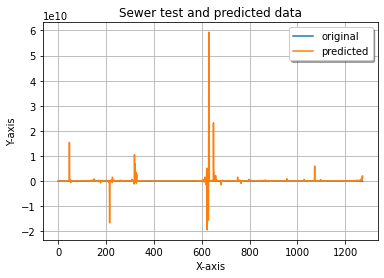

In [ ]:
x_ax = range(0, tdata.count())
y_pred=tdata.select("prediction").collect()
y_orig=tdata.select("처리효율").collect()
 
plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Sewer test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# **MLlib Gradient-boosted Tree Regression Example with PySpark**

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
#sc = SparkContext().getOrCreate()
sqlContext = SQLContext(sc)

data = sqlContext.createDataFrame(df)
print(data.printSchema()) 

root
 |-- 시설용량: long (nullable = true)
 |-- 생물학적: long (nullable = true)
 |-- 고도: long (nullable = true)
 |-- 유입하수량: double (nullable = true)
 |-- 생물학적 유입하수량: double (nullable = true)
 |-- 고도 유입하수량: double (nullable = true)
 |-- 방류량: double (nullable = true)
 |-- 생물학적 방류량: double (nullable = true)
 |-- 고도 방류량: double (nullable = true)
 |-- 유입 COD: double (nullable = true)
 |-- 방류 COD: double (nullable = true)
 |-- 유입 SS: double (nullable = true)
 |-- 방류 SS: double (nullable = true)
 |-- 유입 T-N: double (nullable = true)
 |-- 방류 T-N: double (nullable = true)
 |-- 유입 T-P: double (nullable = true)
 |-- 방류 T-P: double (nullable = true)
 |-- 유입 총대장균군수: long (nullable = true)
 |-- 방류 총대장균군수: long (nullable = true)
 |-- 처리부하량: double (nullable = true)
 |-- 연계처리량_분뇨: double (nullable = true)
 |-- 연계처리량_축산: double (nullable = true)
 |-- 연계처리량_침출수: double (nullable = true)
 |-- 연계처리량_기타: double (nullable = true)
 |-- 사업비(백만원): double (nullable = true)
 |-- 목표수질(BOD)_0: long (nullable = true)
 |--

In [ ]:
features = df.columns.tolist()

va = VectorAssembler(inputCols=features, outputCol='features')

va_df = va.transform(data)
va_df = va_df.select(['features', '처리효율'])
va_df.show(3)

+--------------------+--------+
|            features|처리효율|
+--------------------+--------+
|(56,[0,2,3,5,6,8,...|    98.3|
|[1590000.0,100000...|    95.9|
|[1630000.0,120000...|    97.0|
+--------------------+--------+
only showing top 3 rows



In [ ]:
(train, test) = va_df.randomSplit([0.7, 0.3])

In [ ]:
gbtr = GBTRegressor(featuresCol='features', labelCol='처리효율', maxIter=50)
gbtr = gbtr.fit(train)

In [ ]:
mdata = gbtr.transform(test)
mdata.show(3)
 
rmse=RegressionEvaluator(labelCol="처리효율", predictionCol="prediction", metricName="rmse")
rmse=rmse.evaluate(mdata) 
 
mae=RegressionEvaluator(labelCol="처리효율", predictionCol="prediction", metricName="mae")
mae=mae.evaluate(mdata) 
 
r2=RegressionEvaluator(labelCol="처리효율", predictionCol="prediction", metricName="r2")
r2=r2.evaluate(mdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

+--------------------+--------+-----------------+
|            features|처리효율|       prediction|
+--------------------+--------+-----------------+
|(56,[0,1,2,3,5,6,...|    98.5|98.44152134539394|
|(56,[0,1,3,4,6,7,...|    98.3|98.35718458355767|
|(56,[0,1,3,4,6,7,...|    94.3|94.08235714595423|
+--------------------+--------+-----------------+
only showing top 3 rows

RMSE:  2.0021887170870105
MAE:  0.28464512541374853
R-squared:  0.7341971173520763


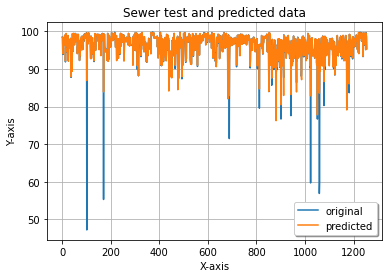

In [ ]:
x_ax = range(0, mdata.count())
y_pred=mdata.select("prediction").collect()
y_orig=mdata.select("처리효율").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Sewer test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 